# Graph Drawing

NetworkX does not have strong visualization capabilities. It primarily relies on an old, modified drawing function that utilizes `matplotlib`. This results in slow, non-interactive drawing with numerous visual defects; for instance, arrows for directed graphs are particularly unappealing.

NetworkX can also be used with `graphviz` through the `pygraphviz` interface, allowing graphs visualized with graphviz to be read, written, and displayed to some extent. It is not recommended that NetworkX be used as a primary tool for graph visualization. Visualization might potentially be removed entirely from NetworkX in the future and moved to a separate package in a future release.

In general, visualizing a graph rarely provides meaningful information. While many graph visualizations are found to be aesthetically pleasing, they often do not convey information about the graph that could be more easily discovered through analysis using different metrics. Moreover, because positional layouts can be arbitrary, they may cause perceived structure where none exists, which is especially true as graphs become larger than 100 nodes.

In [111]:
%matplotlib inline

import networkx as nx

The function responsible for most graph visualization in NetworkX is `nx.draw()`. Let us visualize a Barbell graph, which is formed by joining two complete graphs of size `m1` via a path of the length `m2`.

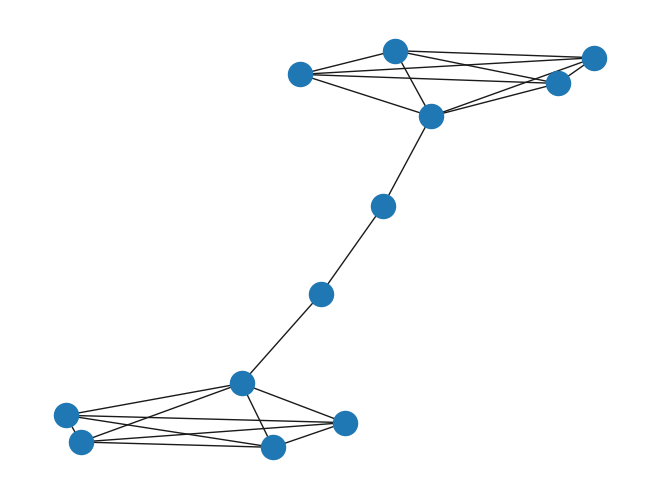

In [112]:
G = nx.barbell_graph(m1=5, m2=2)

nx.draw(G)

If you want to see the labels, you have to set the argument `with_labels=True`

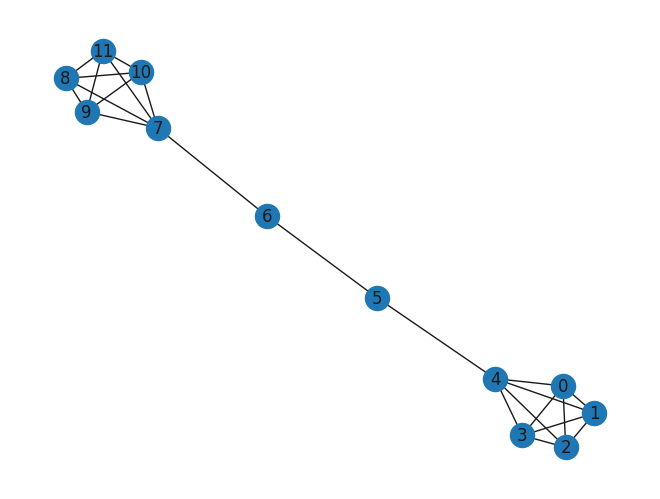

In [113]:
nx.draw(G,with_labels=True)

The issue of physical placement of nodes is handled by the layout function. All these functions are available in the module `nx.layout`.

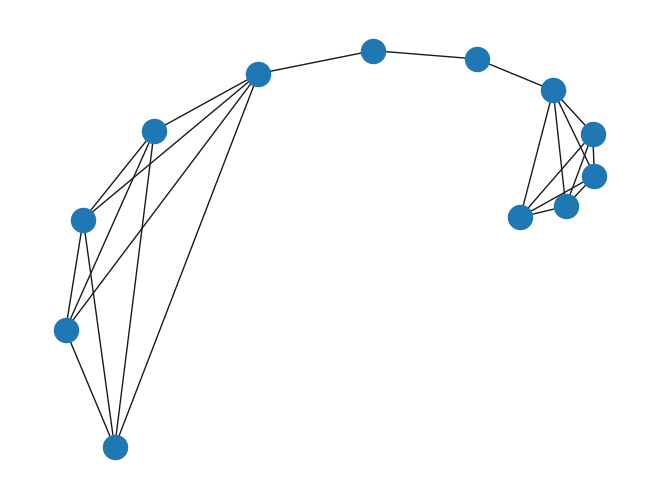

In [114]:
pos = nx.layout.spiral_layout(G)

nx.draw(G,pos=pos)

NetworkX allows controlling selected aspects of the graph's appearance. A detailed catalog of parameters can be found in [the description of the function](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html) `nx.draw_networkx`.

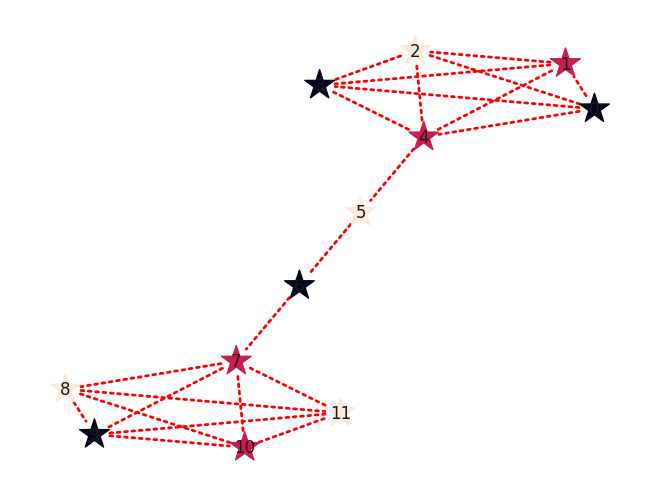

In [115]:
nx.draw(G,
        pos=nx.layout.kamada_kawai_layout(G),
        with_labels=True,
        node_color=[n % 3 for n in G.nodes()],
        node_size=500,
        arrows=True,
        node_shape='*',
        width=2,
        style='dotted',
        edge_color='red',
       )

## K-coreness in Social Network Analysis

In the analysis of social networks, k-coreness is a measure of the local cohesiveness of a node (actor) within the network. It is the largest value of k such that the node belongs to the k-core of the network. The k-core is the largest subgraph of the network in which every node has a degree (number of connections) of at least k within that subgraph.

To find the k-core, an iterative process of removing nodes is used:
- all nodes with a degree less than *k* are removed,
- the removal of these nodes may cause the degrees of some remaining nodes to fall below *k*,
- the removal process is repeated until no node in the remaining subgraph has a degree less than *k*,
- the remaining subgraph is the k-core.

Nodes with higher k-coreness are located in denser, more central parts of the network, while nodes with lower k-coreness are on the periphery. To find k-cores in the network you may use `nx.core_number()` function.

In [116]:
G = nx.random_geometric_graph(50,0.2)
G.nodes(data=True)

NodeDataView({0: {'pos': [0.41378028943019884, 0.5173567277373387]}, 1: {'pos': [0.49848143964755665, 0.7777043526905535]}, 2: {'pos': [0.03553474895301001, 0.024627306096285384]}, 3: {'pos': [0.7475275674542885, 0.8976758436642047]}, 4: {'pos': [0.6874544829939887, 0.6444730390442955]}, 5: {'pos': [0.9393735315814412, 0.5419195701339675]}, 6: {'pos': [0.4163607821045622, 0.48768577913785593]}, 7: {'pos': [0.07736332888655972, 0.2558832959869156]}, 8: {'pos': [0.07460477014611244, 0.9121855289517271]}, 9: {'pos': [0.022575241951629077, 0.6273722337229259]}, 10: {'pos': [0.8278577998211536, 0.4265639772709039]}, 11: {'pos': [0.9594243248067205, 0.2633074116558144]}, 12: {'pos': [0.5226559831246169, 0.9972595870020419]}, 13: {'pos': [0.5212958492941652, 0.6493287341140389]}, 14: {'pos': [0.7469376004709073, 0.38722301477400023]}, 15: {'pos': [0.4452228679458521, 0.7199386610792486]}, 16: {'pos': [0.27663601781211156, 0.7941426058862107]}, 17: {'pos': [0.8743329390204412, 0.44297577760628

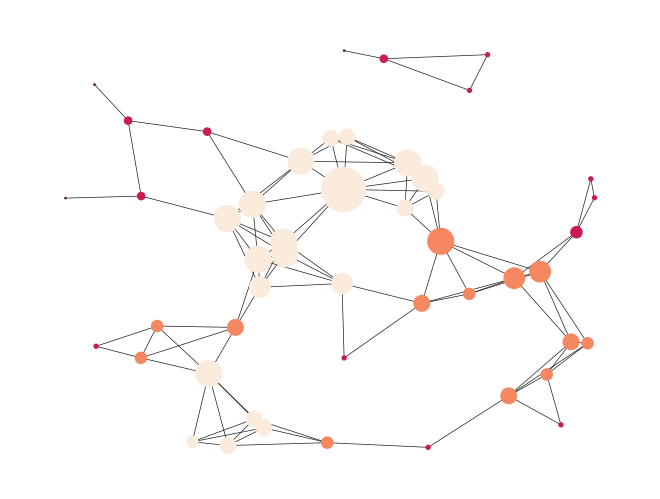

In [117]:
k_core = nx.core_number(G)
k_core_color = [k_core[n] for n in G.nodes()]

pos = {n: G.nodes[n]['pos'] for n in G.nodes()}
size = [G.degree(n)**3 for n in G.nodes()]

nx.draw(G,
        node_color=k_core_color,
        width=.5,
        pos=pos,
        node_size=size)

# Graph generators

NetworkX comes with a large number of builtin graph generators. These can be especially useful for testing out new measures, metrics, and dynamics, on already well tested algorithms. 

NetworkX has the ability to make a bunch of the graphs we made in the previous section. They mainly fall under the `classic` namespace. For example, to make a complete graph, we could just use:

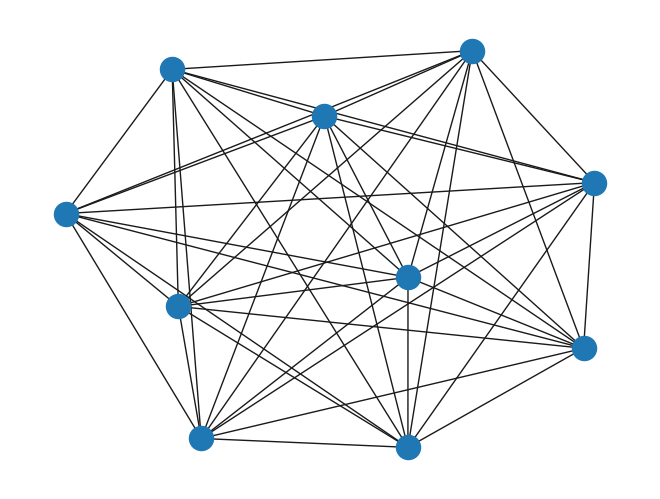

In [118]:
C = nx.classic.complete_graph(n=10)
nx.draw(C)

We don't actually have to use the full namespace call that is `nx.generators.classic.complete_graph`, everythin is under the `nx` module:

In [119]:
C = nx.complete_graph(n=10)
C.nodes(), C.edges()

(NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9)),
 EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 6), (5, 7), (5, 8), (5, 9), (6, 7), (6, 8), (6, 9), (7, 8), (7, 9), (8, 9)]))

Explore the classic generators, create graphs for at least 3 of them. You can list the graphs by typing `nx.generators.classic.[TAB]`. Read the documentation for each (remember you can type (`nx.circulant_graph?`) to see the documentation

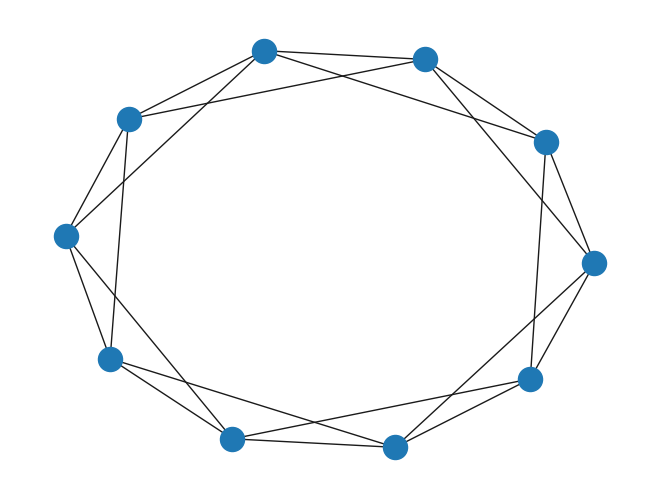

In [120]:
G = nx.generators.classic.circulant_graph(n=10, offsets=[1, 2])
nx.draw(G)

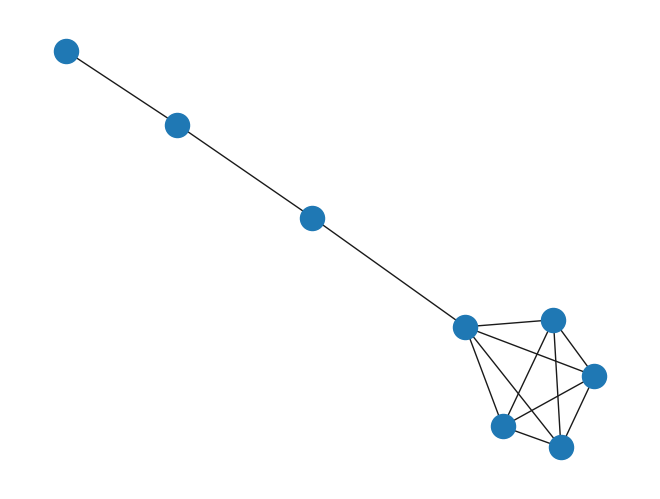

In [121]:
G = nx.generators.classic.lollipop_graph(m=5, n=3)
nx.draw(G)

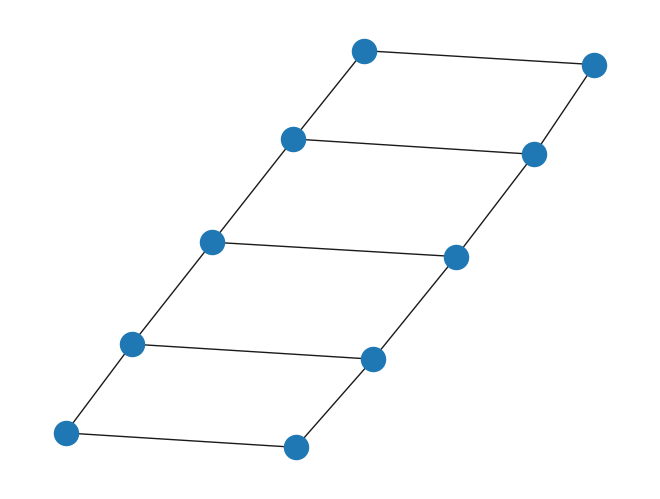

In [122]:
G = nx.generators.classic.ladder_graph(n=5)
nx.draw(G)

## Classic graphs

NetworkX contains a number of small graphs from classic work. For example the Zachary karate Club is often used for testing community finding algorithms. It is included in networkx along with the community information. Similarly, Davis' Southern Women dataset is included.

In [123]:
KC = nx.karate_club_graph()
KC.nodes(data=True)

NodeDataView({0: {'club': 'Mr. Hi'}, 1: {'club': 'Mr. Hi'}, 2: {'club': 'Mr. Hi'}, 3: {'club': 'Mr. Hi'}, 4: {'club': 'Mr. Hi'}, 5: {'club': 'Mr. Hi'}, 6: {'club': 'Mr. Hi'}, 7: {'club': 'Mr. Hi'}, 8: {'club': 'Mr. Hi'}, 9: {'club': 'Officer'}, 10: {'club': 'Mr. Hi'}, 11: {'club': 'Mr. Hi'}, 12: {'club': 'Mr. Hi'}, 13: {'club': 'Mr. Hi'}, 14: {'club': 'Officer'}, 15: {'club': 'Officer'}, 16: {'club': 'Mr. Hi'}, 17: {'club': 'Mr. Hi'}, 18: {'club': 'Officer'}, 19: {'club': 'Mr. Hi'}, 20: {'club': 'Officer'}, 21: {'club': 'Mr. Hi'}, 22: {'club': 'Officer'}, 23: {'club': 'Officer'}, 24: {'club': 'Officer'}, 25: {'club': 'Officer'}, 26: {'club': 'Officer'}, 27: {'club': 'Officer'}, 28: {'club': 'Officer'}, 29: {'club': 'Officer'}, 30: {'club': 'Officer'}, 31: {'club': 'Officer'}, 32: {'club': 'Officer'}, 33: {'club': 'Officer'}})

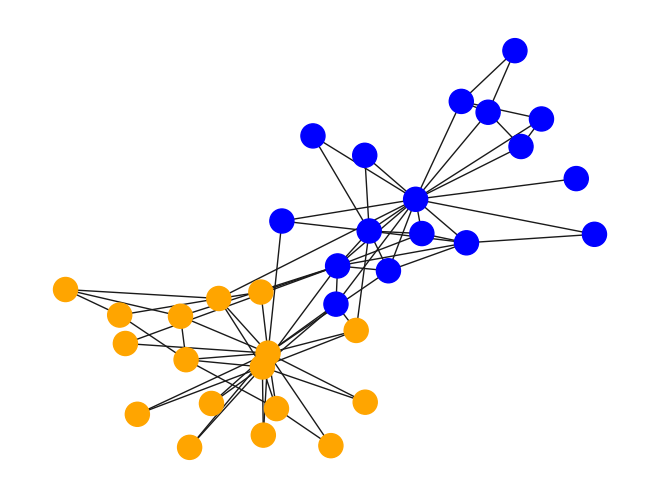

In [124]:
kc_colors = [
    'blue' 
    if KC.nodes[n]['club'] == 'Mr. Hi' else 'orange' 
    for n in KC.nodes
]

nx.draw(KC, node_color=kc_colors)

In [125]:
DSW = nx.davis_southern_women_graph()
DSW.nodes()

NodeView(('Evelyn Jefferson', 'Laura Mandeville', 'Theresa Anderson', 'Brenda Rogers', 'Charlotte McDowd', 'Frances Anderson', 'Eleanor Nye', 'Pearl Oglethorpe', 'Ruth DeSand', 'Verne Sanderson', 'Myra Liddel', 'Katherina Rogers', 'Sylvia Avondale', 'Nora Fayette', 'Helen Lloyd', 'Dorothy Murchison', 'Olivia Carleton', 'Flora Price', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14'))

In [126]:
women, events = nx.bipartite.sets(DSW)
women, events

({'Brenda Rogers',
  'Charlotte McDowd',
  'Dorothy Murchison',
  'Eleanor Nye',
  'Evelyn Jefferson',
  'Flora Price',
  'Frances Anderson',
  'Helen Lloyd',
  'Katherina Rogers',
  'Laura Mandeville',
  'Myra Liddel',
  'Nora Fayette',
  'Olivia Carleton',
  'Pearl Oglethorpe',
  'Ruth DeSand',
  'Sylvia Avondale',
  'Theresa Anderson',
  'Verne Sanderson'},
 {'E1',
  'E10',
  'E11',
  'E12',
  'E13',
  'E14',
  'E2',
  'E3',
  'E4',
  'E5',
  'E6',
  'E7',
  'E8',
  'E9'})

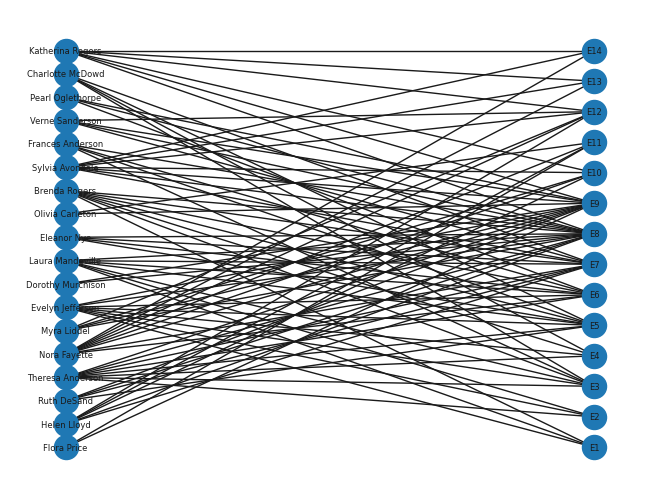

In [127]:
nx.draw(DSW, pos=nx.layout.bipartite_layout(DSW, nodes=women), with_labels=True, font_size=6)

## Random graphs

Random graphs are often used as models for various physical phenomena, and testing new measures and dynamics. NetworkX has a bunch of them built in. For example the classic Erdős–Rényi graph is implemented as `gnp_random_graph` which takes a number of nodes and a probability of connection between any two nodes. Alternatively, we can use `gnm_random_graph` function which takes a number of nodes and a number of edges.

In [128]:
ER_nodes = nx.gnp_random_graph(100, 1.0/100)
ER_nodes.number_of_nodes(), ER_nodes.number_of_edges(), 

(100, 58)

In [129]:
ER_edges = nx.gnm_random_graph(100, 50)
ER_edges.number_of_nodes(), ER_edges.number_of_edges(), 

(100, 50)

The Erdős–Rényi does not have many of the properties seen in real world social network data, particularly, triadic closures. Watts and Strogatz developed a random graph model which accounts for this, and it's implemented in NetworkX. Function `nx.watts_strogatz_graph()` requires the number of nodes (`n`), number of neighbors (`k`), and the probability of random edge re-wiring.

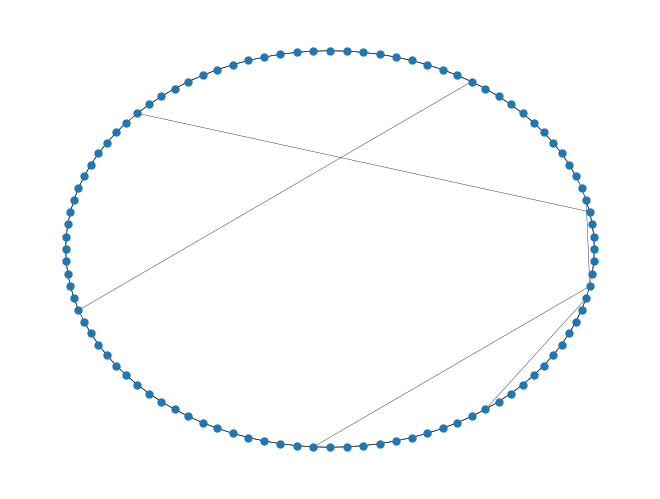

In [130]:
WS = nx.watts_strogatz_graph(n=100, k=4, p=.05)
nx.draw(WS, pos=nx.circular_layout(WS), node_size=25, width=0.3)

A common feature of complex networks is their heavy-tailed degree distribution. That is the degrees of the nodes in a graph varies over many orders of magnitude. NetworkX contains a number of random graph models that have power law degree sequences. One of the most famous is the Barabási–Albert model. In this model nodes are added sequentially and a fixed number of edges between new nodes and existing nodes are added with nodes being selected with probability proportional to their degree. In function `nx.barabasi_albert_graph` the main parameter is the number of edges brought by each new node (`m`).

In [131]:
from collections import Counter

BA = nx.barabasi_albert_graph(100000, m=1)

degree_distribution = sorted([v for k,v in nx.degree(BA)], reverse=True)
degree_counts = dict(Counter(degree_distribution))

In [132]:
import pandas as pd

df = pd.DataFrame(list(degree_counts.items()), columns=['degree', 'count'])

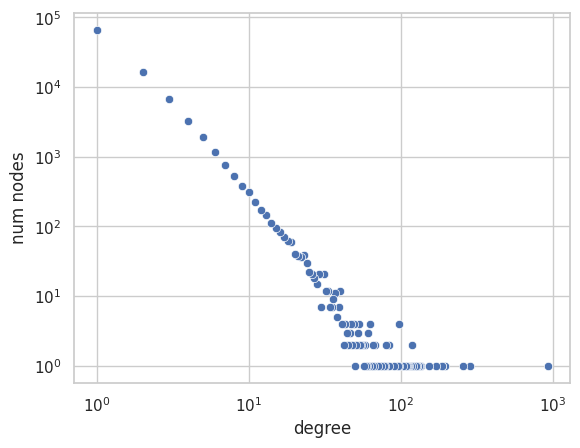

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
ax = sns.scatterplot(data=df, x='degree', y='count')

ax.set_xscale('log')
ax.set_yscale('log')

plt.xlabel('degree')
plt.ylabel('num nodes')
plt.show()

## Exercise

One more exercise and then we'll get to the fun stuff. On disadvantage of the original Barabási–Albert model is that it had an integer average degree and the degree distribution was power law, but could only have integer exponent. Let's make a model that is able to have non-integer exponent.

Let's write a new model. Instead of adding a fixed number of edges with each node, we add a random number of edges from a Poisson distribution with mean $\lambda$. To ensure the graph stays connected, if the random number of edges is 0 we add at least 1 edge. Just as in the original model, we connect to new nodes to the graph to nodes proportional to the degree of the node.

First lets find a function that can generate poisson random numbers for us. It's easy to do with the `numpy` package, we can import numpy and then just call `np.random.poisson` to generate a random number with $Poisson(\lambda)$. A trick to write a fast BA implementation is to maintain a list of nodes with nodes repeated in the list each time they have a connection made. 

In [134]:
import numpy as np

def poisson_BA(n, lam):

    start = max(2, np.random.poisson(lam=lam)) # start with at least two nodes
    
    G = nx.complete_graph(start)
    
    repeated_nodes = []

    # add initial nodes to repeated_nodes list
    for node in G.nodes():
        repeated_nodes.append(node)

    u = start
    
    while u < n:
        # - using the the poisson random number generator, generate a number of connections
        # - make sure it's greater than 1
        # - store that variable in `connections`
        connections = max(1, np.random.poisson(lam=lam))

        for _ in range(connections):
            # - for as many connections as it has select a node at random from repeated_nodes and create an edge
            # - do not forget to update the repeated_nodes list
            target = np.random.choice(repeated_nodes)
            G.add_edge(u, target)
            repeated_nodes.append(target)
            repeated_nodes.append(u)
        u += 1
    return G

If you are successfull, you should be able to run the following cell:

In [135]:
# testing the poisson-based Barabasi-Albert model

PBA = poisson_BA(1000, np.pi)

deg = dict(PBA.degree())

min_degree = min(deg)
max_degree = max(deg)
mean_degree = np.mean([d for n,d in PBA.degree()])

print(f"Minimum degree: {min_degree}, maximum degree: {max_degree}, mean degree: {mean_degree}")

Minimum degree: 0, maximum degree: 999, mean degree: 6.12


# Graph analysis

NetworkX contains several methods for graph analytics. In the following section we will see a couple of examples

## Degree

A common feature of complex networks it's their degree distribution. This is often represented as degree rank plot. Let's check out the degree rank plot of a preferential attachment graph

In [136]:
BA = nx.barabasi_albert_graph(10000,1)

degrees = dict(BA.degree())
list(degrees.items())[:10]

[(0, 74),
 (1, 119),
 (2, 39),
 (3, 86),
 (4, 127),
 (5, 17),
 (6, 103),
 (7, 45),
 (8, 8),
 (9, 61)]

In [137]:
degree_sequence = sorted(degrees.values(), reverse=True)
degree_sequence[:10]

[127, 119, 103, 98, 98, 86, 74, 64, 61, 60]

<module 'matplotlib.pyplot' from '/home/dawid/Projects/INF-3sem-tpd/aiess/python/venv/lib/python3.13/site-packages/matplotlib/pyplot.py'>

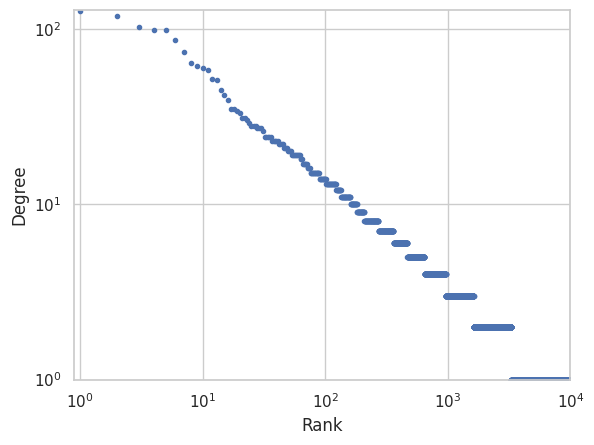

In [138]:
plt.loglog(range(1, BA.order()+1), degree_sequence, 'b.')

plt.xlabel('Rank')
plt.ylabel('Degree')
plt.ylim(1,max(degree_sequence)+1)
plt.xlim(.9,10001)

plt

In the original paper where the Barabási–Albert model was introduced it was stated that it provided a good explanation for the Autonomous Sytems Network. Let's build a network with similar degree structure to a recent snapshot of the Autonomous Systems Network. The data was retrieved from [UCLA's Internet Research Lab's Topology Data](http://irl.cs.ucla.edu/topology/).

First, read in the network, it is in the data folder labeled `20150201.link.v4`

In [139]:
AS = nx.read_edgelist('data/20150201.link.v4', delimiter='\t')

AS.number_of_nodes(), AS.number_of_edges()

(49051, 183861)

In [140]:
avg_num_edges = 2 * AS.number_of_edges() / AS.number_of_nodes()

print(f"Average node degree is {avg_num_edges}")

Average node degree is 7.49672789545575


## Exercise

Generate a graph using the BA model with the average number of edges similar to the empirical average number of edges computed above. Find the degree sequence of the empirical network and the synthetic graph, and use the code below to plot each degree distribution. Is this a good model?

Text(0, 0.5, 'Degree')

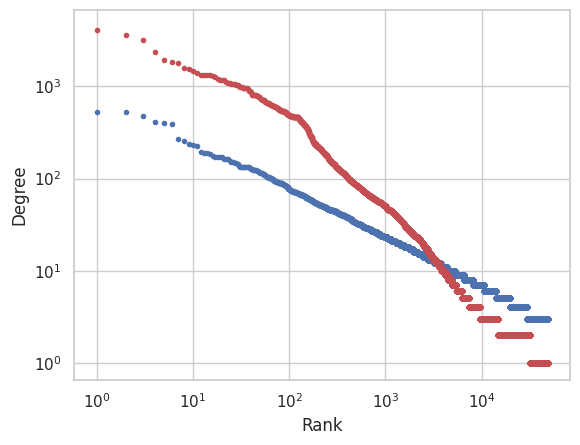

In [141]:
BA = nx.barabasi_albert_graph(AS.number_of_nodes(), int(avg_num_edges / 2))
BA_deg_seq = sorted([d for n, d in BA.degree()], reverse=True)
AS_deg_seq = sorted([d for n, d in AS.degree()], reverse=True)

plt.loglog(BA_deg_seq,'b.',label='BA Model')
plt.loglog(AS_deg_seq,'r.',label='AS Data')
plt.xlabel('Rank')
plt.ylabel('Degree')

Apart from degree, NetworkX offers many other centrality metrics for nodes. You can check them using `nx.centrality.[TAB]`. All these functions return a dictionary with node numbers as keys, and centralities as values

In [142]:
G = nx.barabasi_albert_graph(1000, 1)

degree_cent = nx.degree_centrality(G)
betweenness_cent = nx.betweenness_centrality(G, normalized=True)
closeness_cent = nx.closeness_centrality(G)
pagerank_cent = nx.pagerank(G)
katz_cent = nx.katz_centrality(G, normalized=True, tol=0.001)

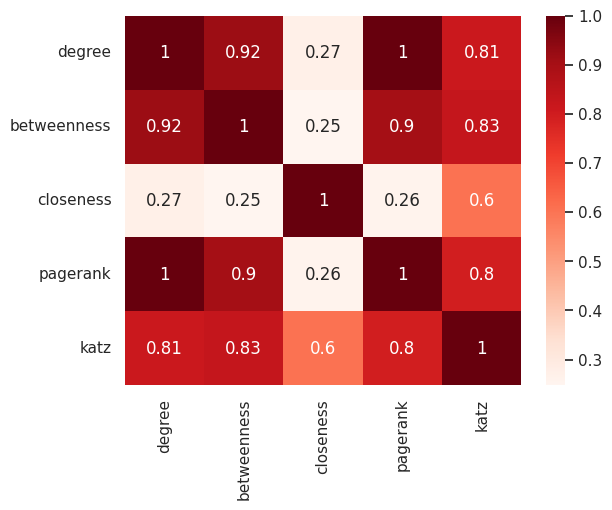

In [143]:
import pandas as pd

df = pd.DataFrame(
    {
        'degree': degree_cent.values(),
        'betweenness': betweenness_cent.values(),
        'closeness': closeness_cent.values(),
        'pagerank': pagerank_cent.values(),
        'katz': katz_cent.values()
    }
)

correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='Reds')
plt.show()

# Exercise

Identifying important nodes is often a common technique in complex network analysis. Degree is a simple measure of centrality, but there are many others. Let's explore a few on some real data on Terrorists in Colonial America. I wish I could claim I came up with this, but I didn't all credit goes to 

[1] http://kieranhealy.org/blog/archives/2013/06/09/using-metadata-to-find-paul-revere/

[2] Fischer, David Hackett. Historians' fallacies: Toward a logic of historical thought. Vol. 1970. London: Routledge & Kegan Paul, 1971.

The data file contains a graph with two types of nodes, 'Organization' and 'Person'. Organizations are different groups who met in colonial America and supported independence from England. People are people attending those meetings. 

First let's get the data from `data/PaulRevereAppD.csv` file, then transform it to extract nodes representing people and organizations, and read it into NetworkX. Check the docs on [how to read bipartite graphs in NetworkX](https://networkx.github.io/documentation/stable/reference/algorithms/bipartite.html)

In [144]:
df = pd.read_csv('data/PaulRevereAppD.csv', index_col='Person')
df.head()

,StAndrewsLodge,LoyalNine,NorthCaucus,LongRoomClub,TeaParty,BostonCommittee,LondonEnemies
Person,,,,,,,
Adams.John,0,0,1,1,0,0,0
Adams.Samuel,0,0,1,1,0,1,1
Allen.Dr,0,0,1,0,0,0,0
Appleton.Nathaniel,0,0,1,0,0,1,0
Ash.Gilbert,1,0,0,0,0,0,0


In [145]:
tups = [
    (person, organization) 
    for (person, organization, membership) 
    in df.stack().reset_index().values.tolist()
    if membership == 1
]

tups[:10]

[('Adams.John', 'NorthCaucus'),
 ('Adams.John', 'LongRoomClub'),
 ('Adams.Samuel', 'NorthCaucus'),
 ('Adams.Samuel', 'LongRoomClub'),
 ('Adams.Samuel', 'BostonCommittee'),
 ('Adams.Samuel', 'LondonEnemies'),
 ('Allen.Dr', 'NorthCaucus'),
 ('Appleton.Nathaniel', 'NorthCaucus'),
 ('Appleton.Nathaniel', 'BostonCommittee'),
 ('Ash.Gilbert', 'StAndrewsLodge')]

Create a new undirected graph `R` and use `tups` as the list of edges

In [146]:
R = nx.Graph(tups)

Check if `R` is bipartite.

In [147]:
nx.is_bipartite(R)

True

Divide the set of nodes in `R` into two sets representing `people` and `orgs`

In [148]:
people, orgs = nx.bipartite.sets(R)

Do the 2-mode -> 1-mode projection of the graph `R` to create a new graph `P` consisting only of people. Two nodes are connected in `P` if the two persons belong to the same organization in `R`.

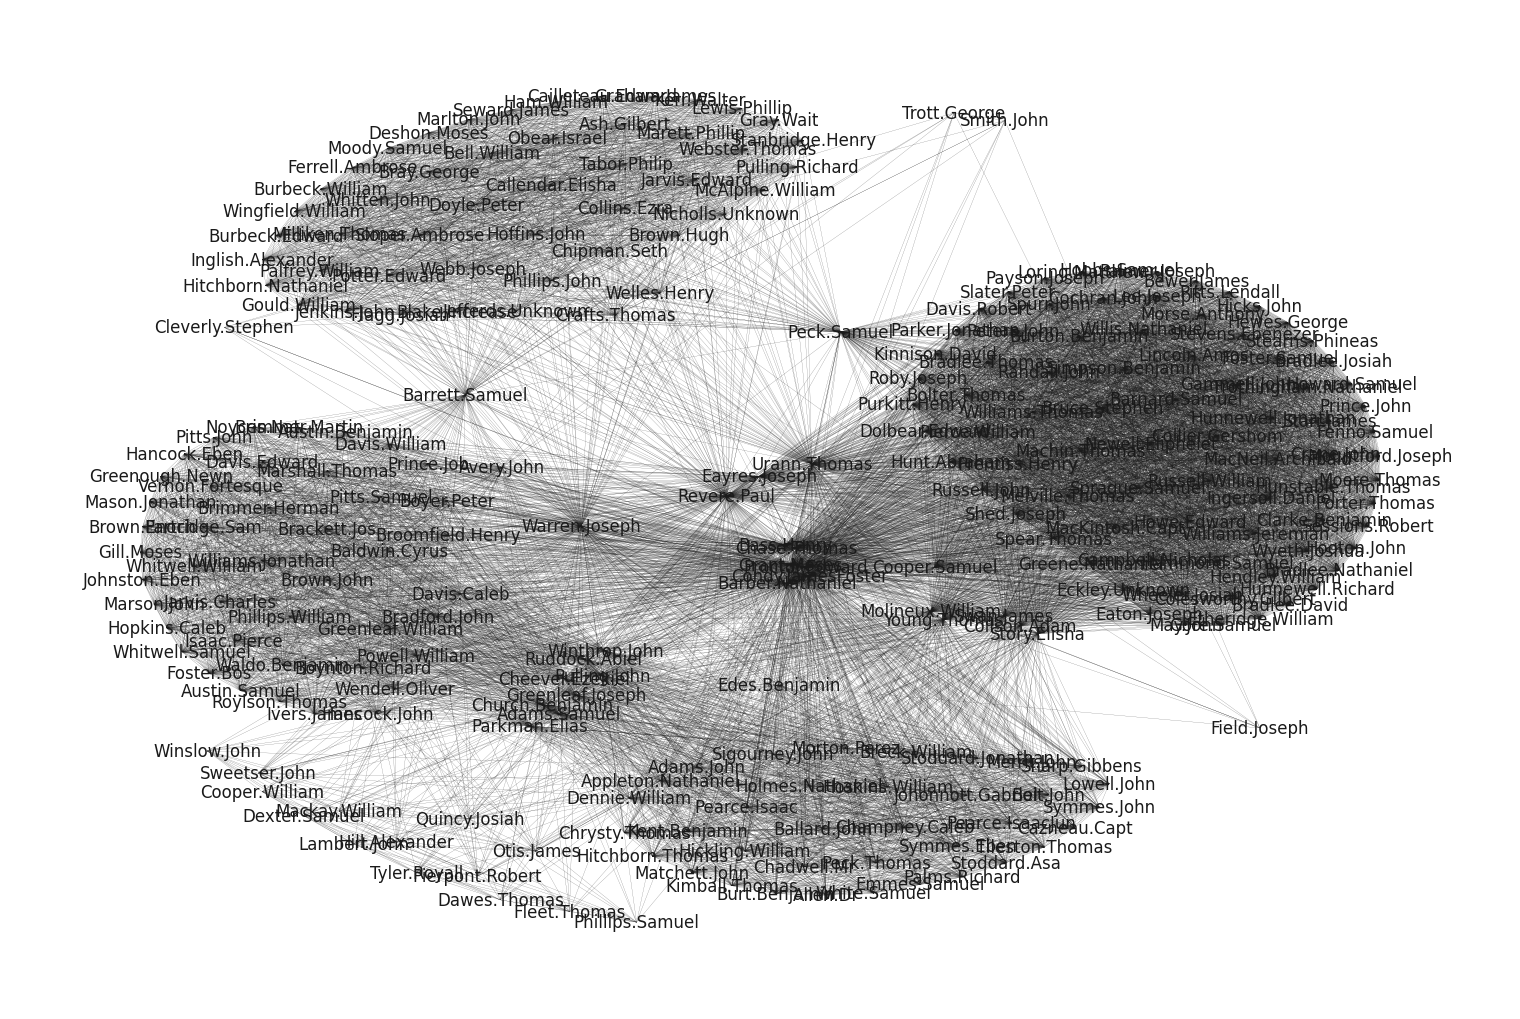

In [149]:
P = nx.bipartite.projected_graph(R, people)

plt.figure(figsize=(15, 10))
nx.draw(P, with_labels=True, node_size=0, width=0.1, pos=nx.layout.kamada_kawai_layout(P))

Repeat the same process to create a graph representing the collaboration between organizations. This time make sure that the projection is weighted, i.e., that for each edge connecting two organizations the edge has information about the number of people who belong to both organizations. Draw the graph and use the weight of each edge to outline the structure of the graph

In [150]:
O = nx.bipartite.weighted_projected_graph(R, orgs)

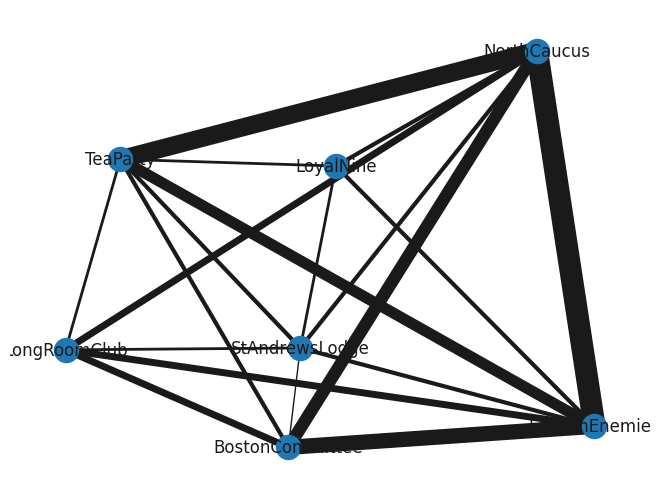

In [151]:
weights = [O[u][v]['weight'] for u, v in O.edges()]
nx.draw(O, with_labels=True, width=weights, pos=nx.layout.kamada_kawai_layout(O))

Compute the weighted degree and the weighted betweenness of organizations. Print out three most important organizations w.r.t. degree and three most important organizations w.r.t. 

In [152]:
weighted_degree = dict(nx.degree(O, weight='weight'))
weighted_betweenness = nx.betweenness_centrality(O, weight='weight')

top_degree = sorted(weighted_degree.items(), key=lambda x: x[1], reverse=True)
print("Top 3 organizations by weighted degree:")
for org, degree in top_degree[:3]:
    print(org, degree)

print("")

top_betweenness = sorted(weighted_betweenness.items(), key=lambda x: x[1], reverse=True)
print("Top 3 organizations by weighted betweenness:")
for org, betweenness in top_betweenness[:3]:
    print(org, betweenness)

Top 3 organizations by weighted degree:
NorthCaucus 49
LondonEnemies 46
TeaParty 31

Top 3 organizations by weighted betweenness:
StAndrewsLodge 0.4
LoyalNine 0.16666666666666666
TeaParty 0.03333333333333333
